<a href="https://colab.research.google.com/github/innocentgodson/MLinpythonexercises/blob/main/MLinPythonexercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1** - Build a linear regression with the dataset below and evaluate the model

Instruction:

- Split the dataset into a training set (70% of the data) and a test set (30% of the data).

- Implement linear regression

- Train the linear regression model on the training set

- Evaluate the trained model's performance on the test set by calculating the Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R-squared

In [52]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    confusion_matrix
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
# Load the california_housing dataset having a continuous target variable.
data = datasets.fetch_california_housing()
# Make a DataFrame
df = pd.DataFrame(np.column_stack([data['data'], data['target']]), columns=data['feature_names'] + ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :8], df['target'], test_size=0.3, random_state=0)

# Create linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.5431489670037241
Root Mean Squared Error: 0.54
Mean Absolute Error: 0.5361818140641839
R-squared: 0.5926087785518774


**Exercise 2** - Build a logistic regression with the dataset below and evaluate the model
Instruction:

Split the dataset into a training set (70% of the data) and a test set (30% of the data).
Implement logistic regression
Train the logistic regression model on the training set
Evaluate the trained model's performance on the test set by calculating the accuracy, precision, recall, and F1 score.

In [55]:
# Load the california_housing dataset having a continuous target variable.
data = datasets.fetch_california_housing()
# Make a DataFrame
df = pd.DataFrame(np.column_stack([data['data'], data['target']]), columns=data['feature_names'] + ['target'])
df['target'] = df['target'].apply(lambda x: 1 if x > df['target'].mean() else 0)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1


In [56]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :8], df['target'], test_size=0.3, random_state=0)

# Create logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=200)

# Fit the model on the training data
model.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives
tp = cm[1, 1]
# False Positives
fp = cm[0, 1]
# False Negatives
fn = cm[1, 0]
# True Negatives
tn = cm[0, 0]

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Specificity
specificity = tn / (tn + fp)
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)


# Print the evaluation metrics
print("Confusion Matrix:", cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("Specificity:", specificity)
print('F1 Score:', f1)

Confusion Matrix: [[3216  470]
 [ 735 1771]]
Accuracy: 0.8053940568475452
Precision: 0.7902721999107541
Recall: 0.7067039106145251
Specificity: 0.8724905046120456
F1 Score: 0.7461554666104907


**Exercise 3** - Perform PCA on the data below to plot the corresponding Cumulative Explained Variance¶

In [57]:
np.random.seed(0)
X_train = np.random.rand(100, 8)  # 100 samples with 8 features
X_test = np.random.rand(50, 8)  # 50 samples with 8 features

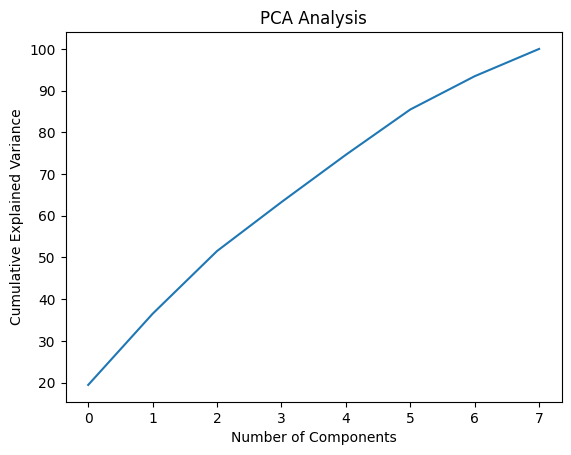

In [58]:
# Perform PCA
covar_matrix = PCA(n_components=8)  # We have 8 features
X_train_pca = covar_matrix.fit_transform(X_train)
X_test_pca = covar_matrix.transform(X_test)
variance = covar_matrix.explained_variance_ratio_  # Calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=6) * 100)  # Cumulative sum of variance explained with [n] features

# Plot explained variance
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()